In [22]:
using DelimitedFiles
using Plots
using Statistics
using LaTeXStrings
using SpecialFunctions
using LsqFit

In dieser Datei werden die numerischen Daten ausgewertet, welche mit dem Code in der Datei **Random_Circuit_model_final.ipynb** generiert wurden. Die hier dargestellten Plots entsprechen den Abbildungen in Abschnitt 5.3 der Bachelorarbeit.

In [23]:
#Operatorgeschwindigkeit:
v_O(q) = (q^2-1)/(q^2 + 1)

#Ordner mit den Daten (der Ordner enthält 100 Duchläufe des zufälligen Quantenschaltkreis für unterschiedliche Seeds):
output_folder = "results_1500"

#Zum laden der Daten:
files = joinpath.(output_folder, readdir(output_folder))

L_f = length(files)

#Arrays definieren in die unsere Daten geladen werden sollen:
res_r = Vector{Matrix{Float64}}(undef, L_f) #Hier wird rho_l für alle Seed abgespeichert
res_l = similar(res_r) #Hier wird rho_r für alle Seed abgespeichert

#Alle Daten im Ordner durchgehen und in res_l und res_r speichern
for (j,f) in enumerate(files[1:L_f])
    res = readdlm(f)
    L2 = size(res,2)
    @assert iseven(L2)
    L = div(L2,2)
    #Die ersten L Werte enstprechen der Operatordichte rho_L
    res_l[j] = reverse(res[:, 1:L],dims=1)
    #Die letzten L Werte enstprechen der Operatordichte rho_R
    res_r[j] = reverse(res[:, L+1:end], dims = 1)
end

In [24]:
#Unsere analytischen Ergbnisse gelten für den Erwartungswert der Operatordichte, also bilden wir
#den Mittelwert aller Realisierungen:

#rho_l und rho_r sind die Operatordichten rho_R(s,\tau) und rho_L(s,\tau):
rho_l = mean(res_l)
rho_r = mean(res_r)
#Standardabweichung der numerisch berechneten Operatordichten rho_R(s,\tau) und rho_L(s,\tau):
drho_l = stdm(res_l,rho_l)
drho_r = stdm(res_r,rho_r)


#Wir wollen auch rho_R(x,t) und rho_L(x,t) plotten, also die Operatordichten in den vergröberten Koordinaten x und t:

#Hier gehen wir von \tau zu t, indem wir zwei Lagen zusammenfassen:
ρ_R_t = [vcat(res_r[i][1:1, :], (res_r[i][2:2:end,:] .+ res_r[i][3:2:end,:])./2) for i in 1:L_f]
ρ_L_t = [vcat(res_l[i][1:1, :], (res_l[i][2:2:end,:] .+ res_l[i][3:2:end,:])./2) for i in 1:L_f]

#Hier gehen wir von s zu x, indem wir zwei Stellen in der Kette zusammenfassen (die erste Spalte welche nur aus Nullen besteht
#wurde rausgelassen, die letzte Spalte welche auch nur aus Nullen besteht wird zur besseren Darstellung später auch rausgelassen):
ρ_R_x_t = [ρ_R_t[i][:,2:2:end] .+ ρ_R_t[i][:,3:2:end] for i in 1:L_f]
ρ_L_x_t = [ρ_L_t[i][:,2:2:end] .+ ρ_L_t[i][:,3:2:end] for i in 1:L_f]

#rho_R(x,t) und rho_L(x,t) ergeben sich wieder wenn wir den Mittelwert bilden:
rho_R_x_t = mean(ρ_R_x_t)
rho_L_x_t = mean(ρ_L_x_t)

#Standardabweichung der numerisch berechneten Operatordichten rho_R(x,t) und rho_L(x,t):
std_R_x_t = stdm(ρ_R_x_t, rho_R_x_t)
std_L_x_t = stdm(ρ_L_x_t, rho_L_x_t)


;

In [25]:
#Bestimmung der gemittelten kumulativen Operatordichten L(x,t),R(x,t) und die jeweiligen Standardabweichungen:

#Array um für jeden Durchlauf die Größe L(x,t) für jede Zeit t abspeichern zu können:
L_array_all = []

#Iteriere über alle 100 Durchläufe:
for j in 1:length(ρ_L_x_t)
   
    #Array definieren um für den Durchlauf j die Werte von L(x,t) für jede Zeit t abzuspeichern
    L_array = zeros(9,20)

    #Iteriere über alle möglichen Zeiten t
    for t in 1:9
        #Speicher für Durchlauf j und Zeit t die Größe L(x,t) ab
        L_array[t,:] = [sum(ρ_L_x_t[j][t, :][i:end]) for i in 1:20]
    end
    #Für Durchlauf j wird der Array L_array abgespeichert, welcher die Werte von L(x,t) enthält für alle möglichen Zeiten t
    push!(L_array_all,L_array)
end
#Wir sind an dem Mittelwert interssiert:
L_avg = mean(L_array_all)
#Standardabweichung, um später die Fluktuationen zwischen verschiedenen Durchläufen darstellen zu können:
L_std = stdm(L_array_all, L_avg)

#Analog erhält man R(x,t) für alle Durchläufe und alle Zeiten 

#Array um für jeden Durchlauf die Größe R(x,t) für jede Zeit t abspeichern zu können:
R_array_all = []
#Iteriere über alle 100 Durchläufe:
for j in 1:length(ρ_R_x_t)
    
    #Array definieren um für den Durchlauf j die Werte von R(x,t) für jede Zeit t abzuspeichern
    R_array = zeros(9,20)
    
    #Iteriere über alle möglichen Zeiten t
    for t in 1:9
        #Speicher für Durchlauf j und Zeit t die Größe R(x,t) ab
        R_array[t,:] = [sum(ρ_R_x_t[j][t, :][1:i]) for i in 1:20]
    end
    #Für Durchlauf j wird der Array R_array abgespeichert, welcher die Werte von R(x,t) enthält für alle möglichen Zeiten t
    push!(R_array_all,R_array)
end
#Wir sind an dem Mittelwert interssiert:
R_avg = mean(R_array_all)
#Standardabweichung, um später die Fluktuationen zwischen verschiedenen Durchläufen darstellen zu können:
R_std = stdm(R_array_all, R_avg);

In [5]:
#Selbst definierter Color scheme:
mycolor = palette([:white, :yellow,:orange,:orange,:red,:red], 10000)

Das Raumzeit-Diagramm in den Koordinaten s und $\tau$ hat nicht in die Bachelorarbeit gepasst. In der Abbildung ist ein Schachbrettmuster zu sehen, was genau mit den Gleichungen (5.14) bzw. (5.15) für die Zeitentwicklung der Operatordichte $\rho_{R}(s,\tau)$ übereinstimmt. Wir haben erwartet, dass die Wahrscheinlichkeit p nach rechts zu springen höher ist als die nach links  für jeden Zeitschritt $\tau$. Das zeigt auch der Plot.

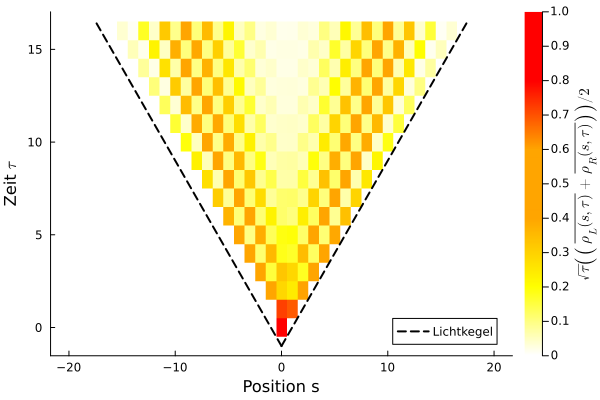

In [6]:
#Raumzeit Diagramm in den Koordinaten \tau und s:
let
    #Die Kette hat eine Länge L=41 und und die Zeit wurde von t=0 bis t=16 laufen gelassen:
    xaxisvalues = -20:20
    yaxisvalues = 0:16

    #mit rho_comp fassen wir die beiden Operatordichten rho_R und rho_L zusammen um sie gemeinsam zu plotten:
    rho_comp = (rho_l .+ rho_r)./2

    #Zur besseren Darstellung multiplizieren wir mit sqrt(\tau)
    for i in 1:17
    
        rho_comp[i,:] = rho_comp[i,:]*sqrt(i)

    end
    
    #Plot des Raumzeit-Diagramms
    heatmap(xaxisvalues, yaxisvalues, rho_comp, color=mycolor,colorbar_title=L"$\sqrt{\tau}\left(\left(\overline{\rho_{L}(s,\tau)} + \overline{\rho_{R}(s,\tau)}\right)\right)/2$")
    

    #Operatorgeschwindigkeit und Lichtgeschwindigkeit:
    v = v_O(2)
    vl = 1

#     plot!(x -> 1/v*(x - 0) , 0:11, label="Operatorgeschwindigkeit", ls=:dash)
    plot!(x -> 1/vl*(x - 1), 0:0.1:17.4, color="black",label="Lichtkegel",ls=:dash,linewidth=2,grid=false)
    plot!(x -> 1/vl*(-x - 1), -17.4:0.1:0, color="black",label=false,ls=:dash,linewidth=2,grid=false)
    
    xlabel!("Position s")
    ylabel!("Zeit "*L"$\tau$")
#     savefig("myplot1.png")
end

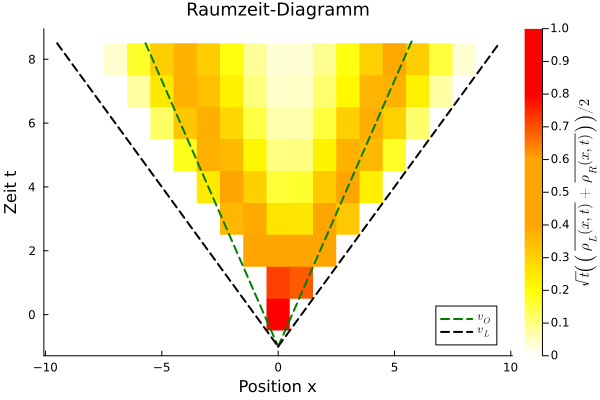

In [26]:
#Raumzeit Diagramm in den Koordinaten t und x:
xaxisvalues = -9:9
yaxisvalues = 0:8

#Mit rho_comp fassen wir die beiden Operatordichten rho_R und rho_L zusammen um sie gemeinsam zu plotten:
#Wir lassen auch die letzte Spalte raus für einen symmetrischen Plot
rho_comp = (rho_L_x_t[:,1:end-1] .+ rho_R_x_t[:,1:end-1])./2

#Zur besseren Darstellung multiplizieren wir mit sqrt(t)
for i in 1:9
    
    rho_comp[i,:] = rho_comp[i,:]*sqrt(i)

end

#Plot des Mittelwerts von rho_L(x,t) und rho_R(x,t):
heatmap(xaxisvalues, yaxisvalues, rho_comp,color=mycolor,colorbar_title=L"$\sqrt{t}\left(\left(\overline{\rho_{L}(x,t)} + \overline{\rho_{R}(x,t)}\right)\right)/2$")
xlabel!("Position x")
ylabel!("Zeit t")
title!("Raumzeit-Diagramm",titlefontsize=12)

#analytisch berechnete Operatorgeschwindigkeit für q=2 und Lichtgeschwindigkeit definieren:
v = v_O(2)
vl = 1

# Plots der Operatorfront bei x=v_O*t und des Lichtkegels
plot!(x -> 1/v*(-x).-1 , -5.7:0.1:0, color="green",label=L"v_{O}", ls=:dash,grid=false,linewidth=2)
plot!(x -> 1/v*(x).-1 , 0:0.1:5.8, color="green", label=false, ls=:dash,grid=false,linewidth=2)
plot!(x -> 1/vl*(x.-1), 0:0.1:9.5, color="black",label=L"v_{L}",ls=:dash,grid=false,linewidth=2)
plot!(x -> -1/vl*(x.+1), -9.5:0.1:0, color="black",label=false,ls=:dash,grid=false,linewidth=2)
# savefig("Raumzeit.pdf")

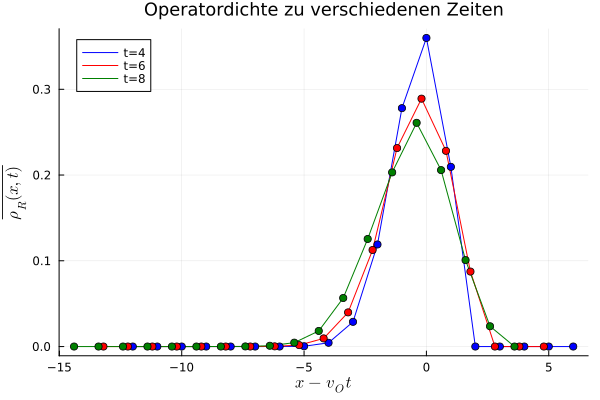

In [8]:
#Plot von Operatordichte zu verschiedenen Zeiten:
x = range(-9, 9, step = 1)

#Plot der Operatordichte \rho_R(x,t) zu den Zeiten t=4,6,8 + Verschiebung der Kurven um v_O*t
plot(x.-5v, rho_R_x_t[5, 1:end-1], label= "t=4",color="blue",legend_position=:topleft)
plot!(x.-7v, rho_R_x_t[7, 1:end-1], label="t=6",color="red")
plot!(x.-9v,  rho_R_x_t[9, 1:end-1],  label="t=8",color="green")
 
#Scatter zur schöneren Darstellung
scatter!(x.-5v, rho_R_x_t[5, 1:end-1], label= false,color="blue")
scatter!(x.-7v, rho_R_x_t[7, 1:end-1], label=false,color="red")
scatter!(x.-9v,  rho_R_x_t[9, 1:end-1],  label=false,color="green")

xlabel!(L"$x-v_{O}t$")
ylabel!(L"$\overline{\rho_{R}(x,t)}$")
title!("Operatordichte zu verschiedenen Zeiten",titlefontsize=12)
# savefig("Verbreitung_mit_t.pdf")

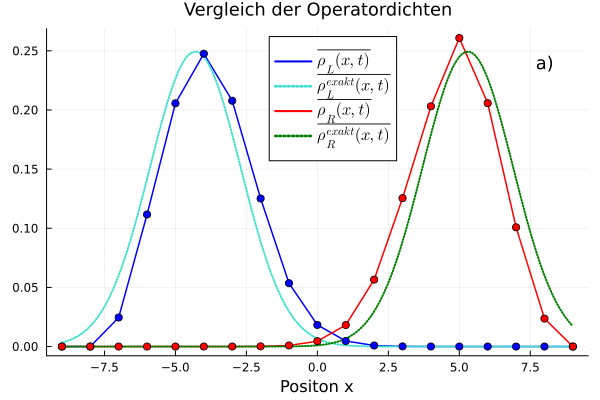

In [28]:
#Vergleich der analytisch und der numerisch bestimmten Operatordichten \rho_L(x,t) bzw. \rho_R(x,t)

x = range(-9, 9, step = 1)
xexakt = range(-9, 9, length = 200)
t=9
v=v_O(2)

#Analytisches Resultat der Operatordichte rho_R(x,t) und rho_L(x,t) aus Abschnitt 5.2 der Bachelorarbeit:
# Die Beiden Gaußkurven müssen um 0.5 nach rechts verschoben werden, da aufgrund der Diskretisierung des Gitters der
# Anfangsstring nicht genau in der Mitte initialisiert werden kann. Das verschieben korrigiert den Fehler.
rhoR_exakt(x,t) = 1/sqrt(pi *(1-v^2)*t) * exp(-((x-0.5) - v*t)^2 /((1-v^2)*t))
rhoL_exakt(x,t) = 1/sqrt(pi *(1-v^2)*t) * exp(-((x-0.5) + v*t)^2 /((1-v^2)*t))

#Plot der Dichte rho_L (numerisch):
plot(x, rho_L_x_t[t, 1:end-1],color="blue",label=L"$\overline{\rho_{L}(x,t)}$",legend_position=(0.5,0.9),lw=1.5,annotations=(8, 0.24, "a)"),annotationfontsize=12)
#Da t=1 im Array rho_R_x_t der Anfangskonfiguration entspricht muss das exakte Ergebnis bei t-1 ausgewertet werden:
plot!(xexakt, rhoL_exakt.(xexakt,t-1), label=L"$\overline{\rho_{L}^{exakt}(x,t)}$",color="turquoise",ls=:dot,lw=2)

#Plot der Dichte rho_R (numerisch):
plot!(x, rho_R_x_t[t, 1:end-1], label=L"$\overline{\rho_{R}(x,t)}$",color="red",lw=1.5)
#Plot des analytischen Ergebnisses: 
plot!(xexakt, rhoR_exakt.(xexakt,t-1), label=L"$\overline{\rho_{R}^{exakt}(x,t)}$", color="green",ls=:dot,lw=2)

#Scatter zur schöneren Darstellung:
scatter!(x, rho_L_x_t[t, 1:end-1], label=false, color="blue")
scatter!(x, rho_R_x_t[t, 1:end-1], label=false, color="red")
plot!(legendfontsize=11)
# plot!(legend=:outertop, legendcolumns=4)
title!("Vergleich der Operatordichten",titlefontsize=12)
xlabel!("Positon x")
# savefig("Vergleich_der_Operatordichten.pdf")

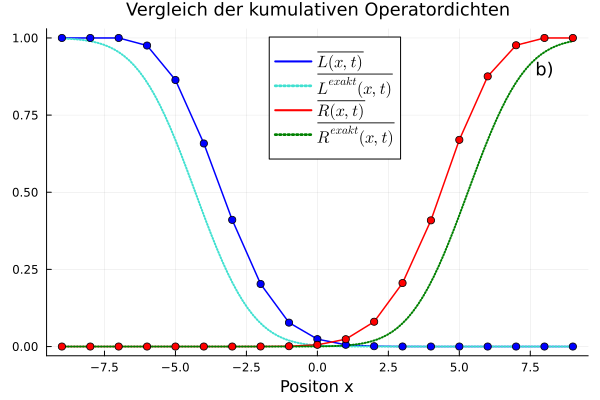

In [47]:
#Vergleich der analytisch und der numerisch bestimmten kumulativen Operatordichten L(x,t) bzw. R(x,t)

t = 9
x = range(-9, 9, step = 1)
xexakt = range(-9, 9, length = 100)
v=v_O(2)

#Ergebnis des exakten Ergebnisses in Abschnitt 5.2 der Bachelorarbeit (auch hier wurde um 0.5 verschoben):
R_exakt(x,t) = (1/2) * (erf(((x-0.5) - t*v_O(2)) * (1/sqrt(t*(1-v_O(2)^2)))) + 1)
L_exakt(x,t) = (1/2) * (-erf(((x-0.5) + t*v_O(2)) * (1/sqrt(t*(1-v_O(2)^2)))) +1)

#Berechnung der numerischen kumulativen Operatordichten (wurde zwar schon weiter oben getan, aber für eine lokalen Vergleich
#hier nochmal):
R = [sum(rho_R_x_t[t, :][1:i]) for i in 1:length(rho_R_x_t[t, :])]
L = [sum(rho_L_x_t[t, :][i:end]) for i in 1:length(rho_L_x_t[t, :])]

#Plot von L(x,t) (exkat und numerisch)
plot(x ,L[1:end-1],color="blue",label=L"$\overline{L(x,t)}$",legend_position=(0.5,0.9),lw=1.5,annotations=(8, 0.9, "b)"),annotationfontsize=12)
plot!(xexakt, L_exakt.(xexakt,t-1),label=L"$\overline{L^{exakt}(x,t)}$",color="turquoise",ls=:dot,lw=2)

#Plot von R(x,t) (exkat und numerisch)
plot!(x ,R[1:end-1],color="red",label = L"$\overline{R(x,t)}$",lw=1.5)
plot!(xexakt, R_exakt.(xexakt,t-1),label=L"$\overline{R^{exakt}(x,t)}$", color="green",ls=:dot,lw=2)

scatter!(x ,L[1:end-1], color="blue",label=false)
scatter!(x ,R[1:end-1], color="red",label=false)


plot!(legendfontsize=11)
title!("Vergleich der kumulativen Operatordichten",titlefontsize=12)
xlabel!("Positon x")
# savefig("Vergleich_der_kumulativen_Operatordichten.pdf")

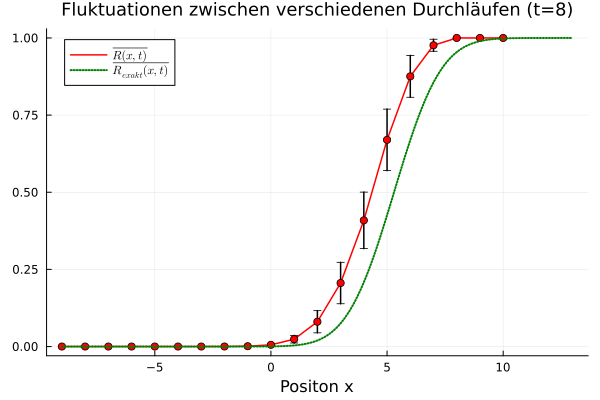

In [30]:
#Plot der kumulativen Operatordichten R(x,t) inkl. Standardabweichung und der analytischen Vorhersage:
t = 9
x = range(-9, 10, step = 1)
xexakt = range(-9, 13, length = 200)

R = [sum(rho_R_x_t[t, :][1:i]) for i in 1:length(rho_R_x_t[t, :])]
#Analytisches Resultat der kumulativen Operatordichte, vgl. Gleichung (5.34)
R_exakt(x,t) = (1/2) * (erf(((x-0.5) - (t-1)*v_O(2)) * (1/sqrt((t-1)*(1-v_O(2)^2)))) + 1)


#Die Standardabweichung von R(x,t) wurde am Anfang des Notebooks berechnet
plot(x, R, yerror = R_std[t,:], label=L"$\overline{R(x,t)}$",color="red",lw=1.5)
scatter!(x, R, label=false,color="red")
plot!(xexakt,R_exakt.(xexakt,t), label=L"$\overline{R_{exakt}(x,t)}$",color="green",ls=:dot,lw=2)
title!("Fluktuationen zwischen verschiedenen Durchläufen (t=8)",titlefontsize=12)
xlabel!("Positon x")
# savefig("Fluktuationen.pdf")

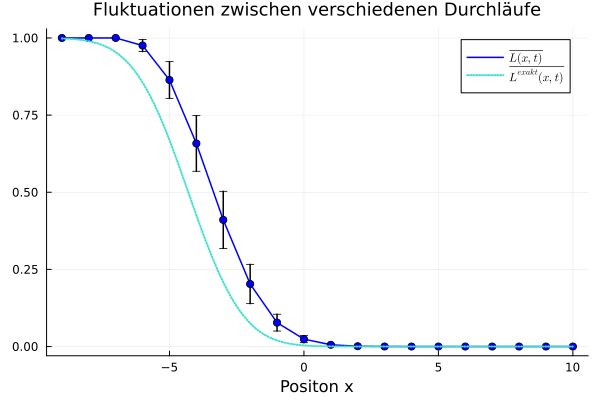

In [31]:
#Plot der kumulativen Operatordichten L(x,t) inkl. Standardabweichung und der analytischen Vorhersage:
#(nicht in der Bachelorarbeit)
t = 9
x = range(-9, 10, step = 1)
xexakt = range(-9, 10, length = 100)

L = [sum(rho_L_x_t[t, :][i:end]) for i in 1:length(rho_L_x_t[t, :])]
#Analytisches Resultat der kumulativen Operatordichte L(x,t)
L_exakt(x,t) = (1/2) * (-erf(((x-0.5) + t*v_O(2)) * (1/sqrt(t*(1-v_O(2)^2)))) +1)



#Die Standardabweichung von L(x,t) wurde am Anfang des Notebooks berechnet
plot(x, L, yerror = L_std[end,:], label=L"$\overline{L(x,t)}$",color="blue",lw=1.5)
scatter!(x, L, label=false,color="blue")
plot!(xexakt, L_exakt.(xexakt,t-1), label=L"$\overline{L^{exakt}(x,t)}$",color="turquoise",ls=:dot,lw=2)
title!("Fluktuationen zwischen verschiedenen Durchläufe",titlefontsize=12)
xlabel!("Positon x")

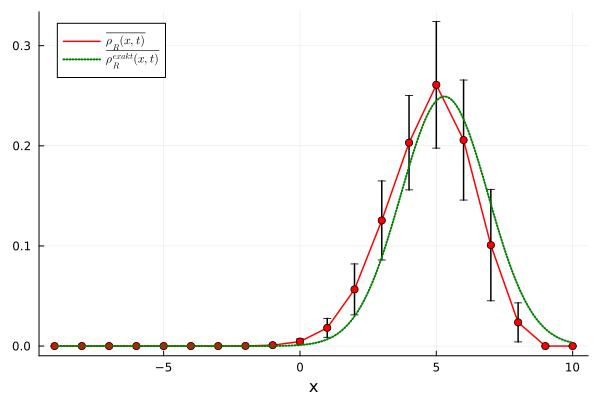

In [46]:
#Plot der Operatordichten rho_R(x,t) inkl. Standardabweichung und der analytischen Vorhersage:
#(nicht in der Bachelorarbeit)
t = 9 
x = range(-9, 10, step = 1)
v = v_O(2)
xexakt = range(-9, 10, length = 200)


#Analytisches Resultat der Operatordichte rho_R(x,t)
rhoR_exakt(x,t) = 1/sqrt(pi *(1-v^2)*t) * exp(-((x-0.5) - v*t)^2 /((1-v^2)*t))

plot(x, rho_R_x_t[t, :], yerror = std_R_x_t[t,:],label=L"$\overline{\rho_{R}(x,t)}$",color="red",lw=1.5)
scatter!(x, rho_R_x_t[t, :], label=false, color="red")
#Da t=1 im Array rho_R_x_t der Anfangskonfiguration entspricht muss das exakte Ergebnis bei t-1 ausgewertet werden:
plot!(xexakt, rhoR_exakt.(xexakt,t-1), label=L"$\overline{\rho_{R}^{exakt}(x,t)}$",color="green",ls=:dot,lw=2)

xlabel!("x")
# ylabel!(L"$\overline{\rho_{R}^{exakt}(x,t)}, \overline{\rho_{R}(x,t)}$")
# savefig("myplot.png")

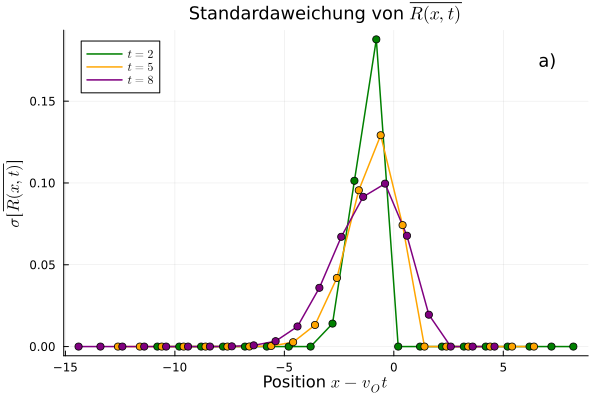

In [35]:
#Standardabweichung von R(x,t) zu verschiedenen Zeiten:

x = range(-9, 10, step = 1)
v = v_O(2)


#Plot der Standardabweichung von R(x,t) + Verschiebung um v_O*t
plot(x.-3v,R_std[3,:],label=L"t=2",lw=1.5,color="green",annotations=(7, 0.175, "a)"),annotationfontsize=12,legend_position=:topleft)
plot!(x.-6v,R_std[6,:],label=L"t=5",lw=1.5,color="orange")
plot!(x.-9v,R_std[9,:],label=L"t=8",lw=1.5,color="purple")

scatter!(x.-3v,R_std[3,:],label=false,lw=1.5,color="green")
scatter!(x.-6v,R_std[6,:],label=false,lw=1.5,color="orange")
scatter!(x.-9v,R_std[9,:],lw=1.5,color="purple",label=false)

xlabel!("Position "*L"$x-v_{O}t$")
ylabel!(L"$\sigma[\overline{R(x,t)}]$")
title!("Standardaweichung von " *L"$\overline{R(x,t)}$",titlefontsize=12)
# savefig("Sdtaw_R.pdf")

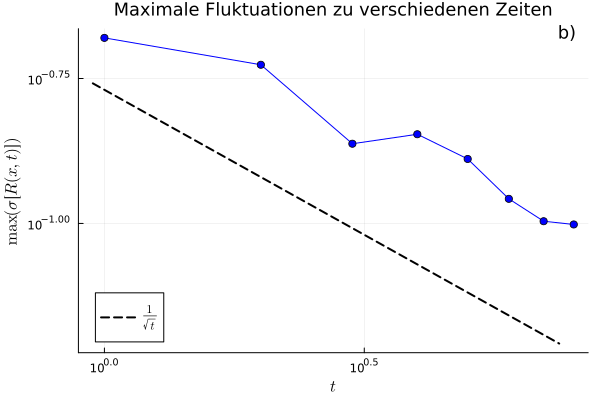

In [36]:
#doppelt logarithmischer Plot des zeitlichen Verlaufs des Maximums der Standardabweichung von R(x,t)

#Array wo das Maximum von der Standardabweichung der kumulativen Dichte R(x,t) für alle t gespeichert wird
std_max = zeros(8)

#Bestimme das Maximum der Standardabweichung zu jedem Zeitpunt t 
for i in 1:8
    
    std_max[i] = maximum(R_std[i+1,:])
    
end

valuesrange = 1:8
valuesrange_theo = 0.95:0.01:7.5

#reziproke Wurzel als Fit definieren:
sqrt_negtiv(x) = 0.17*x^(-0.5)

#Plot der maximalen Standardabweichung für jeden Zeitpunkt (logarithmischer Plot)
plot(valuesrange,std_max,color="blue",label=false,xscale=:log10,yscale=:log10,annotations=(10^(0.89), 10^(-0.67), "b)"),annotationfontsize=12)
scatter!(valuesrange,std_max,color="blue",label=false)

#Plot der reziproken Wurzel
plot!(valuesrange_theo,sqrt_negtiv.(valuesrange_theo),color="black",ls=:dash,lw=2,label=L"$\frac{1}{\sqrt{t}}$",legend_position=:bottomleft)
xlabel!(L"$t$")
ylabel!(L"$\max(\sigma[R(x,t)])$")
title!("Maximale Fluktuationen zu verschiedenen Zeiten", titlefontsize=12)
# savefig("max_fluk.pdf")

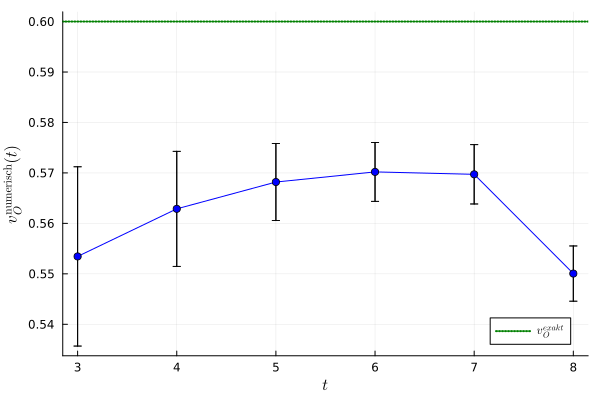

In [38]:
#numerisch gefittete Operatorgeschwindigkeit v_O zu verschiedenen Zeiten:

#Array wo die gefittete Operatorgeschwindigkeit gespeichert wird und Array wo der Fehler beim Fit gespiechert wird
velocities = []
error = []
time = 9
x = range(-9, 9, step = 1)

#Exaktes Ergebnis der Gaußkurve mit 2 freien Parametern (p[2] = Amplitude und p[1] = Operatorgeschwindigkeit)
rhoR_exakt(x,t,p) = p[2]/sqrt(pi *(1-p[1]^2)*t) .* exp.(-((x.-0.5) .- p[1].*t).^2 ./((1-p[1]^2)*t))
for n in 4:time
    
    #Gaußkurve zum Zeitpunkt t ist unser Fit Modell
    rhoR_model(x,p) = rhoR_exakt(x,n-1,p)
    
    #first guess der gesuchten Parameter:
    p0 = [0.6,1] 
    #Fit der Parameter
    fit = curve_fit(rhoR_model, x, rho_R_x_t[n, 1:end-1], p0)
    push!(velocities, fit.param[1]) #Geschwindigkeiten zum Zeitpunkt t
    push!(error, stderror(fit)[1]) #Fehler der gefitteten Geschwindigkeiten zum Zeitpunkt t

    
end


xwerte = 3:8

#Plot der gefitteten Geschwindigkeiten zu verschiedenen Zeitpunkten
plot(xwerte,velocities,yerror = error,color="blue",label=false)
scatter!(xwerte,velocities,yerror = error,color="blue",label=false)
hline!([0.6],color="green",label=L"$v_{O}^{exakt}$",lw=2,ls=:dot) #analytisches Ergebnis für v_O
xlabel!(L"$t$")
ylabel!(L"$v_{O}^{\mathrm{numerisch}}(t)$")
# savefig("Geschwindigkeit_gg_t.pdf")

In [39]:
#Vergleich mit anderen Bond Dimensions:
#Lade Daten für Bond Dimension: 50, 100, 300, 750, 1000

#Ordner wo die Daten zu den verschiedenen Bond Dimensions gespeichert sind
output_folder2 = "results_50"
output_folder3 = "results_100"
output_folder4 = "results_300"
output_folder5 = "results_750"
output_folder6 = "results_1000"


#Zum uploaden der Daten:


#Bond Dimension 50
files2 = joinpath.(output_folder2, readdir(output_folder2))
L_f2 = length(files2)
res_r2 = Vector{Matrix{Float64}}(undef, L_f2)
res_l2 = similar(res_r2)
for (j,f) in enumerate(files2[1:L_f2])
    res2 = readdlm(f)
    L2 = size(res2,2)
    @assert iseven(L2)
    L = div(L2,2)
    res_l2[j] = reverse(res2[:, 1:L],dims=1)
    res_r2[j] = reverse(res2[:, L+1:end], dims = 1)
end

#Bond Dimension 100
files3 = joinpath.(output_folder3, readdir(output_folder3))
L_f3 = length(files3)
res_r3 = Vector{Matrix{Float64}}(undef, L_f3)
res_l3 = similar(res_r3)
for (j,f) in enumerate(files3[1:L_f3])
    res3 = readdlm(f)
    L2 = size(res3,2)
    @assert iseven(L2)
    L = div(L2,2)
    res_l3[j] = reverse(res3[:, 1:L],dims=1)
    res_r3[j] = reverse(res3[:, L+1:end], dims = 1)
end

#Bond Dimension 300
files4 = joinpath.(output_folder4, readdir(output_folder4))
L_f4 = length(files4)
res_r4 = Vector{Matrix{Float64}}(undef, L_f4)
res_l4 = similar(res_r4)
for (j,f) in enumerate(files4[1:L_f4])
    res4 = readdlm(f)
    L2 = size(res4,2)
    @assert iseven(L2)
    L = div(L2,2)
    res_l4[j] = reverse(res4[:, 1:L],dims=1)
    res_r4[j] = reverse(res4[:, L+1:end], dims = 1)
end

#Bond Dimension 750
files5 = joinpath.(output_folder5, readdir(output_folder5))
L_f5 = length(files5)
res_r5 = Vector{Matrix{Float64}}(undef, L_f5)
res_l5 = similar(res_r5)
for (j,f) in enumerate(files5[1:L_f5])
    res5 = readdlm(f)
    L2 = size(res5,2)
    @assert iseven(L2)
    L = div(L2,2)
    res_l5[j] = reverse(res5[:, 1:L],dims=1)
    res_r5[j] = reverse(res5[:, L+1:end], dims = 1)
end

##Bond Dimension 1000
files6 = joinpath.(output_folder6, readdir(output_folder6))
L_f6 = length(files6)
res_r6 = Vector{Matrix{Float64}}(undef, L_f6)
res_l6 = similar(res_r6)
for (j,f) in enumerate(files6[1:L_f6])
    res6 = readdlm(f)
    L2 = size(res6,2)
    @assert iseven(L2)
    L = div(L2,2)
    res_l6[j] = reverse(res6[:, 1:L],dims=1)
    res_r6[j] = reverse(res6[:, L+1:end], dims = 1)
end

In [40]:
#Wir wollen auch rho_R(x,t) und rho_L(x,t) plotten, also die Operatordichten in den vergröberten Koordinaten x und t:
#Die Berechnungen sind analog wie oben für unsere Hauptergebnisse


#Bond Dimension = 50:
ρ_R_t2 = [vcat(res_r2[i][1:1, :], (res_r2[i][2:2:end,:] .+ res_r2[i][3:2:end,:])./2) for i in 1:L_f2]
ρ_L_t2 = [vcat(res_l2[i][1:1, :], (res_l2[i][2:2:end,:] .+ res_l2[i][3:2:end,:])./2) for i in 1:L_f2]

ρ_R_x_t2 = [ρ_R_t2[i][:,2:2:end] .+ ρ_R_t2[i][:,3:2:end] for i in 1:L_f2]
ρ_L_x_t2 = [ρ_L_t2[i][:,2:2:end] .+ ρ_L_t2[i][:,3:2:end] for i in 1:L_f2]

rho_R_x_t2 = mean(ρ_R_x_t2)
rho_L_x_t2 = mean(ρ_L_x_t2)

std_R_x_t2 = stdm(ρ_R_x_t2, rho_R_x_t2)
std_L_x_t2 = stdm(ρ_L_x_t2, rho_L_x_t2)

#Bond Dimension = 100:
ρ_R_t3 = [vcat(res_r3[i][1:1, :], (res_r3[i][2:2:end,:] .+ res_r3[i][3:2:end,:])./2) for i in 1:L_f3]
ρ_L_t3 = [vcat(res_l3[i][1:1, :], (res_l3[i][2:2:end,:] .+ res_l3[i][3:2:end,:])./2) for i in 1:L_f3]

ρ_R_x_t3 = [ρ_R_t3[i][:,2:2:end] .+ ρ_R_t3[i][:,3:2:end] for i in 1:L_f3]
ρ_L_x_t3 = [ρ_L_t3[i][:,2:2:end] .+ ρ_L_t3[i][:,3:2:end] for i in 1:L_f3]

rho_R_x_t3 = mean(ρ_R_x_t3)
rho_L_x_t3 = mean(ρ_L_x_t3)

std_R_x_t3 = stdm(ρ_R_x_t3, rho_R_x_t3)
std_L_x_t3 = stdm(ρ_L_x_t3, rho_L_x_t3)

#Bond Dimension = 300:
ρ_R_t4 = [vcat(res_r4[i][1:1, :], (res_r4[i][2:2:end,:] .+ res_r4[i][3:2:end,:])./2) for i in 1:L_f4]
ρ_L_t4 = [vcat(res_l4[i][1:1, :], (res_l4[i][2:2:end,:] .+ res_l4[i][3:2:end,:])./2) for i in 1:L_f4]

ρ_R_x_t4 = [ρ_R_t4[i][:,2:2:end] .+ ρ_R_t4[i][:,3:2:end] for i in 1:L_f4]
ρ_L_x_t4 = [ρ_L_t4[i][:,2:2:end] .+ ρ_L_t4[i][:,3:2:end] for i in 1:L_f4]

rho_R_x_t4 = mean(ρ_R_x_t4)
rho_L_x_t4 = mean(ρ_L_x_t4)

std_R_x_t4 = stdm(ρ_R_x_t4, rho_R_x_t4)
std_L_x_t4 = stdm(ρ_L_x_t4, rho_L_x_t4)

#Bond Dimension = 750:
ρ_R_t5 = [vcat(res_r5[i][1:1, :], (res_r5[i][2:2:end,:] .+ res_r5[i][3:2:end,:])./2) for i in 1:L_f5]
ρ_L_t5 = [vcat(res_l5[i][1:1, :], (res_l5[i][2:2:end,:] .+ res_l5[i][3:2:end,:])./2) for i in 1:L_f5]

ρ_R_x_t5 = [ρ_R_t5[i][:,2:2:end] .+ ρ_R_t5[i][:,3:2:end] for i in 1:L_f5]
ρ_L_x_t5 = [ρ_L_t5[i][:,2:2:end] .+ ρ_L_t5[i][:,3:2:end] for i in 1:L_f5]

rho_R_x_t5 = mean(ρ_R_x_t5)
rho_L_x_t5 = mean(ρ_L_x_t5)

std_R_x_t5 = stdm(ρ_R_x_t5, rho_R_x_t5)
std_L_x_t5 = stdm(ρ_L_x_t5, rho_L_x_t5)

#Bond Dimension = 1000:
ρ_R_t6 = [vcat(res_r6[i][1:1, :], (res_r6[i][2:2:end,:] .+ res_r6[i][3:2:end,:])./2) for i in 1:L_f6]
ρ_L_t6 = [vcat(res_l6[i][1:1, :], (res_l6[i][2:2:end,:] .+ res_l6[i][3:2:end,:])./2) for i in 1:L_f6]

ρ_R_x_t6 = [ρ_R_t6[i][:,2:2:end] .+ ρ_R_t6[i][:,3:2:end] for i in 1:L_f6]
ρ_L_x_t6 = [ρ_L_t6[i][:,2:2:end] .+ ρ_L_t6[i][:,3:2:end] for i in 1:L_f6]

rho_R_x_t6 = mean(ρ_R_x_t6)
rho_L_x_t6 = mean(ρ_L_x_t6)

std_R_x_t6 = stdm(ρ_R_x_t6, rho_R_x_t6)
std_L_x_t6 = stdm(ρ_L_x_t6, rho_L_x_t);

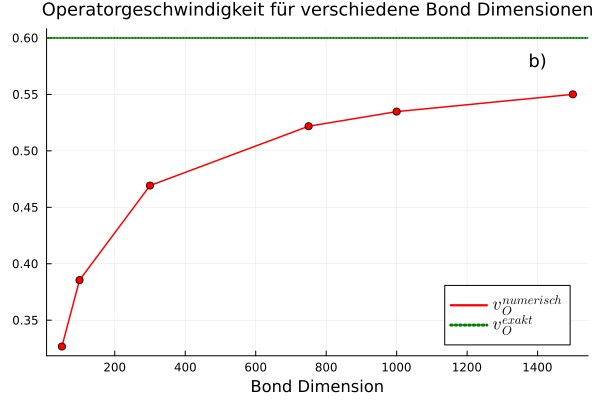

In [41]:
#Numerischer Fit der Operatorgeschwindigkeit bei verschiedenen Bond Dimensionen zur Zeit t
time = 9
x = range(-9, 9, step = 1)
velocities = [] #Zum abspeichern der numerisch gefitteten Geschwindigkeit

#Analytisches Ergebnis als Modell des Fits definieren
rhoR_exakt(x,t,p) = p[2]/sqrt(pi *(1-p[1]^2)*t) .* exp.(-((x.-0.5) .- p[1].*t).^2 ./((1-p[1]^2)*t))    
rhoR_model(x,p) = rhoR_exakt(x,time-1,p)

#first guess der Parameter
p0 = [0.6,1]

#Fit der Operatorgeschwindigkeit für alle Bond Dimensions
fit2 = curve_fit(rhoR_model, x, rho_R_x_t2[time, 1:end-1], p0) #50
fit3 = curve_fit(rhoR_model, x, rho_R_x_t3[time, 1:end-1], p0) #100
fit4 = curve_fit(rhoR_model, x, rho_R_x_t4[time, 1:end-1], p0) #300 
fit5 = curve_fit(rhoR_model, x, rho_R_x_t5[time, 1:end-1], p0) #750
fit6 = curve_fit(rhoR_model, x, rho_R_x_t6[time, 1:end-1], p0) #1000
fit = curve_fit(rhoR_model, x, rho_R_x_t[time, 1:end-1], p0) #1500
    
    
#Laden in Array velocities um später ein Plot erstellen zu können
push!(velocities, fit2.param[1])
push!(velocities, fit3.param[1])
push!(velocities, fit4.param[1])
push!(velocities, fit5.param[1])
push!(velocities, fit6.param[1])
push!(velocities, fit.param[1])

    
#alle verwendeten Bond Dimensions   
bond_Dim = [50,100,300,750,1000,1500]

#Plot der gefitteteten Operatorgeschwindigkeiten als Funktion der Bond Dimenion
plot1 = plot(bond_Dim,velocities,color="red",label=L"$v_{O}^{numerisch}$",lw=1.5,annotations=(1400, 0.58, "b)"),annotationfontsize=12)
scatter!(bond_Dim,velocities,label=false,color="red",lw=1.5)
xlabel!("Bond Dimension")
# ylabel!("Operatorgeschwindigkeit "* L"$v_{O}$")
hline!([0.6],color="green",label=L"$v_{O}^{exakt}$",lw=2,ls=:dot) #analytische Operatorgeschwindigkeit 
title!("Operatorgeschwindigkeit für verschiedene Bond Dimensionen",titlefontsize=12)

plot!(legendfontsize=12)
# savefig("Geschwindigkeit_gegen_Bondim.pdf")
# plot!(legend=:outertop, legendcolumns=4)

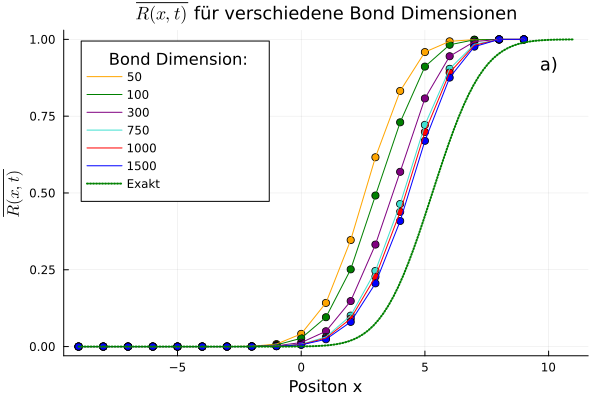

In [42]:
#Plot der kumulativen Operatordichte R(x,t) für verschiedene Bond Dimensionen:

t = 9
x = range(-9, 9, step = 1)
xexakt = range(-9, 11, length = 100)
v=v_O(2)

#Bestimme numerisch alle kumulativen Operatordichten R(x,t) für jeded Bond Dimension
R = [sum(rho_R_x_t[t, :][1:i]) for i in 1:length(rho_R_x_t[t, :])] #1500
R2 = [sum(rho_R_x_t2[t, :][1:i]) for i in 1:length(rho_R_x_t2[t, :])] #50
R3 = [sum(rho_R_x_t3[t, :][1:i]) for i in 1:length(rho_R_x_t3[t, :])] #100
R4 = [sum(rho_R_x_t4[t, :][1:i]) for i in 1:length(rho_R_x_t4[t, :])] #300
R5 = [sum(rho_R_x_t5[t, :][1:i]) for i in 1:length(rho_R_x_t5[t, :])] #750
R6 = [sum(rho_R_x_t6[t, :][1:i]) for i in 1:length(rho_R_x_t6[t, :])] #1000




#Analytisches Resultat der kumulativen Operatordichte
R_exakt(x,t) = (1/2) * (erf(((x-0.5) - (t-1)*v_O(2)) * (1/sqrt((t-1)*(1-v_O(2)^2)))) + 1)




#Plot der Daten:
scatter(x, R2[1:end-1], label=false,color="orange",annotations=(10, 0.92, "a)"),annotationfontsize=12)
scatter!(x, R3[1:end-1], label=false,color="green")
scatter!(x, R4[1:end-1], label=false,color="purple")
scatter!(x, R5[1:end-1], label=false,color="turquoise")
scatter!(x, R6[1:end-1], label=false,color="red")
scatter!(x, R[1:end-1], label=false,color="blue")

plot!(x, R2[1:end-1], label="50",color="orange",legendtitle="Bond Dimension:")
plot!(x, R3[1:end-1], label="100",color="green")
plot!(x, R4[1:end-1], label="300",color="purple")
plot!(x, R5[1:end-1], label="750",color="turquoise")
plot!(x, R6[1:end-1], label="1000",color="red")
plot!(x, R[1:end-1], label="1500",color="blue")

#Plot des exakten Ergebnisses um konvergenz zu zeigen
plot!(xexakt,R_exakt.(xexakt,t), label="Exakt", color="green",ls=:dot,lw=2)
title!(L"$\overline{R(x,t)}$ "*"für verschiedene Bond Dimensionen",titlefontsize=12)
xlabel!("Positon x")
# plot!(legendfontsize=12)
ylabel!(L"$\overline{R(x,t)}$")
# savefig("R_gegen_Bonddim.pdf")

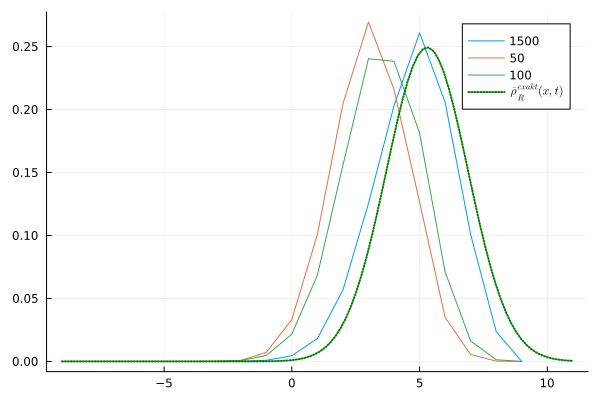

In [45]:
#Operatordichte rho_R(x,t) für verschiedene Bond Dimensionen
#(nicht in der Bachelorarbeit)

#Analytisches Resultat der Operatordichte rho_R(x,t)
rhoR_exakt(x,t) = 1/sqrt(pi *(1-v^2)*t) * exp(-((x-0.5) - v*t)^2 /((1-v^2)*t))

plot(x, rho_R_x_t[t, 1:end-1], label="1500")
plot!(x, rho_R_x_t2[t, 1:end-1], label="50")
plot!(x, rho_R_x_t3[t, 1:end-1], label="100")


plot!(xexakt, rhoR_exakt.(xexakt,t-1), label=L"$\bar{\rho}_{R}^{exakt}(x,t)$", color="green",ls=:dot,lw=2)